In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
PATH_train='Data/Titanic/train.csv'
PATH_test='Data/Titanic/test.csv'

In [3]:
titanic_train=pd.read_csv(PATH_train)
titanic_test=pd.read_csv(PATH_test)

In [4]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Test set is missing the value of 'Survived' which is the target

In [5]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_test.shape

(418, 11)

In [8]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Uniqueness of the features

train에 사용되는 모델 수가 891인데 target을 제외하고 
Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
인 것으로 보아 those should be of categorical types except 'Survived' which is the target

In [9]:
titanic_train.nunique().sort_values(ascending=True)

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

### Missing value analysis

In [10]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

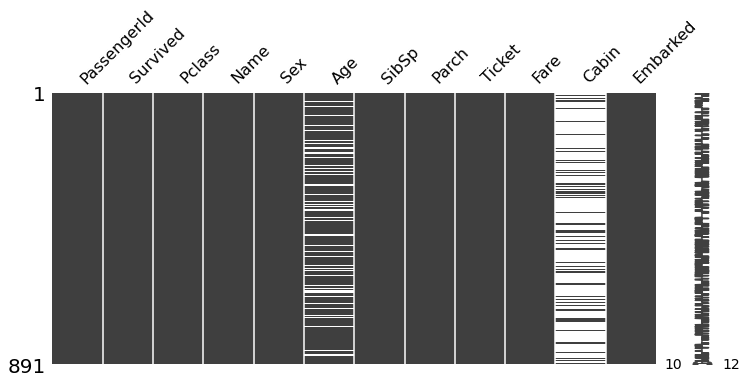

In [11]:
msno.matrix(titanic_train,figsize=(12,5))

In [12]:
nanList=['Age', 'Cabin', 'Embarked']
for nan in nanList :
    titanic_train[nan].dropna(axis=0, inplace=True)
    print(np.sum(titanic_train[nan].isna()))

0
0
0


### Type Change

확인해 보니 여기서는 categorical type이 아닌 경우 더 편하게 데이터를 다룰 수 있는 것 같다.

In [19]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# categoryVariableList = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
# for var in categoryVariableList:
#     titanic_train[var] = titanic_train[var].astype("category")

In [15]:
# typesCountSerie = titanic_train.dtypes.value_counts()

# # format columns as arrays of either strings or integers
# # typeNames are easier to sort as array of `string` rather than an array of `dtype`
# typeNamesColumn = list(map(lambda t: t.name , typesCountSerie.index.values));
# typeCountColumn = typesCountSerie.values

# # create an initial dataframe, with multiple occurences of the same "variableType"
# intialDataTypeDf = pd.DataFrame({
#     "variableType": typeNamesColumn, 
#     "count": typeCountColumn
# })

# # Group initial data frame by "variableType", 
# # then reset_index to have a proper dataframe
# groupedDataTypeDf = intialDataTypeDf.groupby(['variableType']).sum().reset_index()

# # Plot as expect
# fig,ax = plt.subplots()
# fig.set_size_inches(12,5)
# sns.barplot(data=groupedDataTypeDf, x="variableType",y="count", ax=ax)

# Value Analysis

In [23]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Values that seems important to me
* Pclass ~ Sex > Fare> Embarked> Cabin > Age> SibSp > Parch
* money-related values : Pclass, Fare, Cabin, Embarked(connection between class and where you live)
* sex-related : Sex, SibSp
* Age-related : Age, Parch

# Survived

In [34]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Count on Survived')

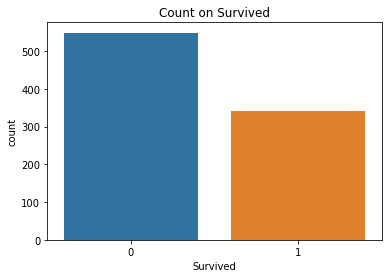

In [53]:
sns.countplot(x=titanic_train['Survived']).set_title('Count on Survived')

Survived count is less compared to dead

# Pclass

* The number of passengers is outstandingly large in Pclass 3

In [64]:
titanic_train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [65]:
titanic_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Count on Pclass')

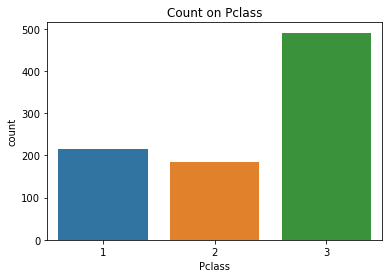

In [54]:
sns.countplot(x=titanic_train['Pclass']).set_title('Count on Pclass')

* Survival rate increases according to the level of Pclass
* It doesn't have any specific relation between embarked and Pclass but as Pclass level increases, number of Embarked site 'S' increases

[Text(0, 0.5, 'Pclass'),
 Text(0.5, 0, 'Embarked'),
 Text(0.5, 1.0, 'Embarked location on Pclass')]

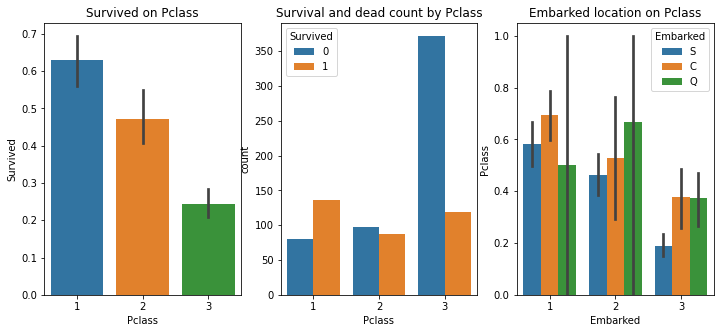

In [71]:
fig, ax=plt.subplots(ncols=3)
fig.set_size_inches(12, 5)

sns.barplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Pclass', y='Survived', ax=ax[0])
ax[0].set(title='Survived on Pclass', xlabel='Pclass', ylabel='Survived')

sns.countplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Pclass', hue='Survived', ax=ax[1])
ax[1].set(title='Survival and dead count by Pclass', xlabel='Pclass', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Pclass', y='Survived', hue='Embarked', ax=ax[2])
ax[2].set(title='Embarked location on Pclass', xlabel='Embarked', ylabel='Pclass')

In [74]:
titanic_train.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

### Survival rate according to sex and pclass

In [81]:
class_sex_df=titanic_train.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

class_sex_df

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


The rate of survival increases on female, but it dramatically dreases when it comes to Pclass 3

[Text(0, 0.5, 'Survived'),
 Text(0.5, 0, 'Pclass'),
 Text(0.5, 1.0, 'Survival rate according to sex and pclass')]

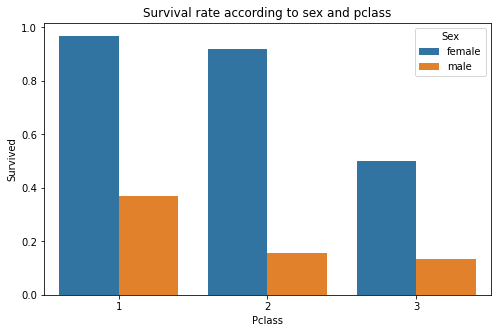

In [84]:
fig, ax=plt.subplots()
fig.set_size_inches(8, 5)

sns.barplot(data=class_sex_df, x='Pclass', y='Survived', hue='Sex', ax=ax)
ax.set(title='Survival rate according to sex and pclass', xlabel='Pclass', ylabel='Survived')

# Fare

* As the fare increases, the rate of survival increases
* As Pclass level increases, both of fare and the survival rate increase

In [113]:
titanic_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

It is weird that we have min value of 0 because not any fare would be of 0. So, let's see how many of the values would be of zero's

In [148]:
zero_cond=titanic_train['Fare']==0
titanic_train[zero_cond].groupby('Pclass').describe()

PassengerId                                                        \
             count        mean         std    min     25%    50%     75%   
Pclass                                                                     
1              5.0  668.800000  239.592780  264.0  634.00  807.0  816.00   
2              6.0  508.166667  168.882701  278.0  427.25  474.5  626.75   
3              4.0  338.250000  180.872653  180.0  249.00  287.5  376.75   

              Survived        ... Parch       Fare                           \
          max    count  mean  ...   75%  max count mean  std  min  25%  50%   
Pclass                        ...                                             
1       823.0      5.0  0.00  ...   0.0  0.0   5.0  0.0  0.0  0.0  0.0  0.0   
2       733.0      6.0  0.00  ...   0.0  0.0   6.0  0.0  0.0  0.0  0.0  0.0   
3       598.0      4.0  0.25  ...   0.0  0.0   4.0  0.0  0.0  0.0  0.0  0.0   

                  
        75%  max  
Pclass            
1       0.0  0.0  
2       0.0  0.0  
3       0.0  0.0  

[3 rows x 48 columns]

There are total of 15 zeros in 'Fare' column and Pclass 1 > 2 > 3 order. It's weird! So, let's make those columns NaN to avoid confusion

In [150]:
def remove_zero_fares(row) :
    if row.Fare == 0 :
        row.Fare=np.NaN
    return row

titanic_train=titanic_train.apply(remove_zero_fares, axis=1)
titanic_test=titanic_train.apply(remove_zero_fares, axis=1)

In [152]:
titanic_train.loc[titanic_train.Fare==0].shape[0]

0

In [157]:
# Check if it did the job
print('Number of zero-Fares: {:d}'.format(titanic_train.loc[titanic_train.Fare==0].shape[0]))   # shape이 tuple이므로 shape[0]은 행 수를 의미함

Number of zero-Fares: 0


In [170]:
titanic_train['Fare'].isnull().sum()

15

Then, we have 15 null data in 'Fare' column

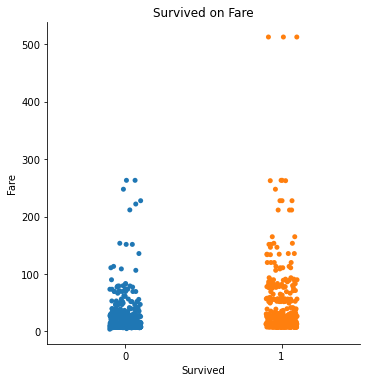

In [171]:
sns.catplot(data=titanic_train[['Survived', 'Fare']], x='Survived', y='Fare').set(title='Survived on Fare')

[Text(0.5, 1.0, 'Survival rate according to fare ranges and Pclass')]

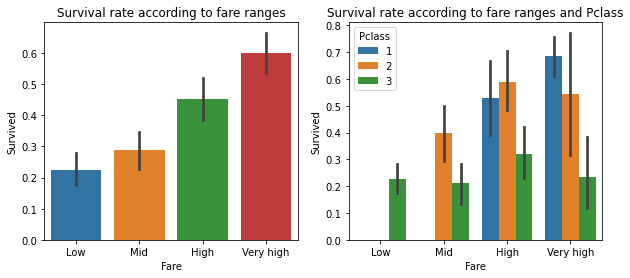

In [172]:
fare_ranges = pd.qcut(titanic_train.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])

fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

sns.barplot(data=titanic_train[['Survived', 'Fare']], x=fare_ranges, y='Survived', ax=ax[0])
ax[0].set(title='Survival rate according to fare ranges')

sns.barplot(data=titanic_train[['Survived', 'Fare', 'Pclass']], x=fare_ranges, y='Survived', hue='Pclass', ax=ax[1])
ax[1].set(title='Survival rate according to fare ranges and Pclass')

[Text(0.5, 1.0, 'The relationship of Fare and Pclass')]

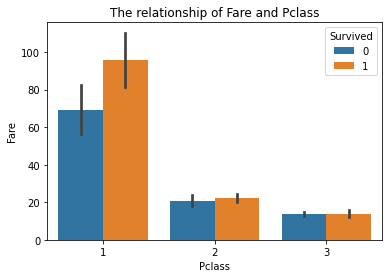

In [173]:
sns.barplot(data=titanic_train[['Survived', 'Fare', 'Pclass']], x='Pclass', y='Fare', hue='Survived').set(title='The relationship of Fare and Pclass')

# Sex

[Text(0.5, 1.0, 'Survivals by sex')]

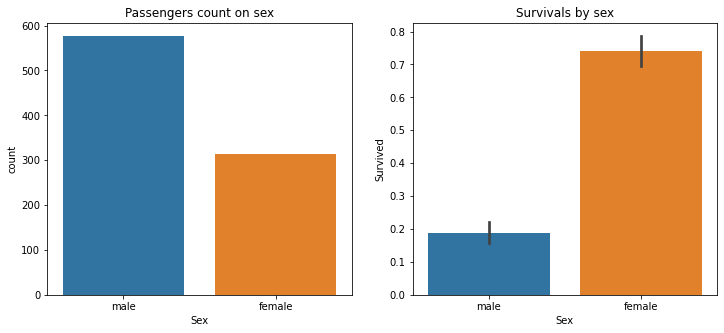

In [59]:
catData=titanic_train[['Survived', 'Sex']]
fig,ax = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=catData, x="Sex", ax=ax[0])
ax[0].set(xlabel='Sex', title='Passengers count on sex')

sns.barplot(data=catData, x="Sex", y="Survived", ax=ax[1])
ax[1].set(title='Survivals by sex')

# SibSp

* If there's SibSp, the possibility of survival increases compared to none, but even if a passenger has SibSp, survival rate decreases as the number of SibSp increases. 
-> SibSp = 1 probably means a couple, so the rate of survival if SibSp =1.
-> It seems that it gets hard to rescue the member of the siblings if the number of their members increases.

[Text(0, 0.5, 'Survived'),
 Text(0.5, 0, 'SibSp'),
 Text(0.5, 1.0, 'Survived on SibSp')]

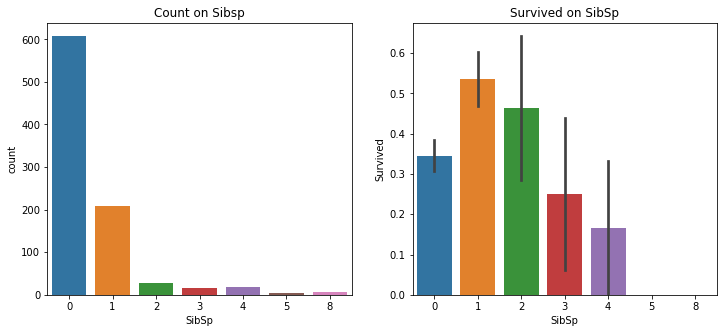

In [60]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=titanic_train[['Survived', 'SibSp']], x='SibSp', ax=ax[0])
ax[0].set(title='Count on Sibsp', xlabel='SibSp', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'SibSp']], x='SibSp', y='Survived', ax=ax[1])
ax[1].set(title='Survived on SibSp', xlabel='SibSp', ylabel='Survived')

# Embarked

[Text(0, 0.5, 'Survived'),
 Text(0.5, 0, 'Embarked'),
 Text(0.5, 1.0, 'Count on Embarked location according to Pclass')]

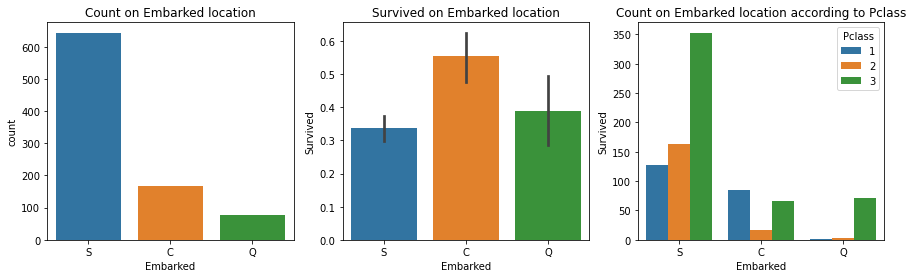

In [193]:
fig, ax=plt.subplots(ncols=3)
fig.set_size_inches(15, 4)

sns.countplot(data=titanic_train[['Survived', 'Embarked']], x='Embarked', ax=ax[0])
ax[0].set(title='Count on Embarked location', xlabel='Embarked', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'Embarked']], x='Embarked', y='Survived', ax=ax[1])
ax[1].set(title='Survived on Embarked location', xlabel='Embarked', ylabel='Survived')

# The reason why C location boarded passengers survived a lot more than did in other two places
sns.countplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Embarked', hue='Pclass', ax=ax[2])
ax[2].set(title='Count on Embarked location according to Pclass', xlabel='Embarked', ylabel='Survived')

/// 여기까지 했음! https://www.kaggle.com/mviola/titanic-eda-simple-model-0-80622/comments 참고!!

# Parch

[Text(0, 0.5, 'Survived'),
 Text(0.5, 0, 'Parch'),
 Text(0.5, 1.0, 'Survived on Parch')]

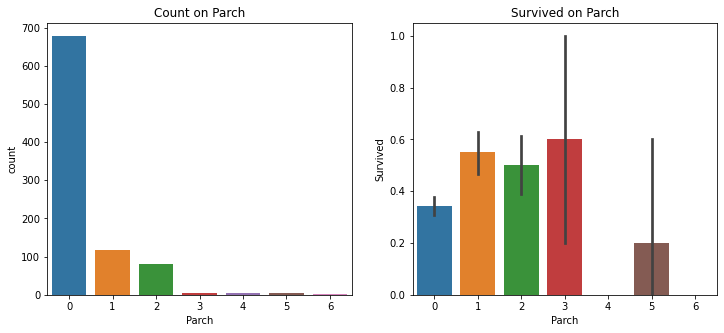

In [61]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=titanic_train[['Survived', 'Parch']], x='Parch', ax=ax[0])
ax[0].set(title='Count on Parch', xlabel='Parch', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'Parch']], x='Parch', y='Survived', ax=ax[1])
ax[1].set(title='Survived on Parch', xlabel='Parch', ylabel='Survived')

# Age

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Survived and dead count on age')]

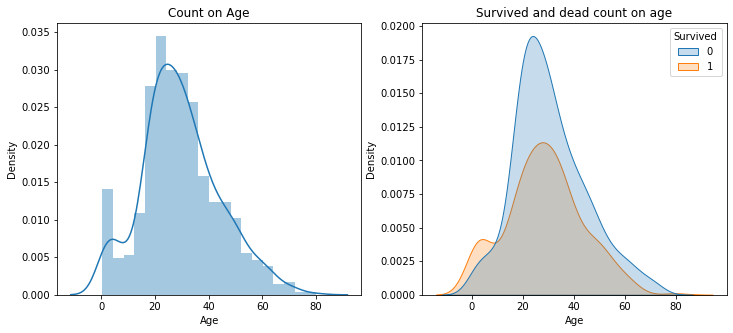

In [95]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.distplot(titanic_train[['Age']],ax=ax[0])
ax[0].set(title='Count on Age', xlabel='Age')

sns.kdeplot(data=titanic_train[['Age', 'Survived']], x='Age', hue='Survived', shade=True, ax=ax[1])
ax[1].set(title='Survived and dead count on age', xlabel='Age')

#### Survived by age and sex

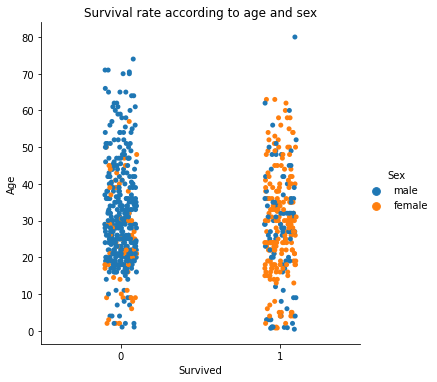

In [98]:
sns.catplot(data=titanic_train[['Age', 'Sex', 'Survived']], x='Survived', y='Age', hue='Sex').set(title='Survival rate according to age and sex', xlabel='Survived', ylabel='Age')

#### Survived by age, sex and Pclass 

/Users/jihun/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Pclass'),
 Text(0.5, 1.0, 'Survival rate according to Pclass in Age')]

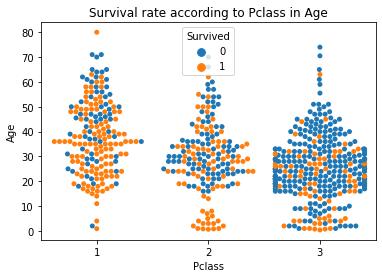

In [105]:
sns.swarmplot(data=titanic_train[['Age', 'Sex', 'Pclass', 'Survived']], x='Pclass', y='Age', hue='Survived').set(title='Survival rate according to Pclass in Age', xlabel='Pclass', ylabel='Age')